<a id="1"></a>
# <p style="padding:15px;background-color:#022629;margin:0;color:#91f2eb;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">Sistem Rekomendasi Produk Pada Toko Alat Tulis dan Peralatan Kantor[Cleaning]</p>

<div style="background-color:#91f2eb; padding:30px; font-size:14px; border-radius: 5px 5px;">

**🛒Goal:**
    
Setiap bulan atau tahun, retailer dapat mengunggah data penjualan produk dalam format CSV, yang mencakup informasi penjualan harian. Aplikasi ini akan secara otomatis memperbarui database dengan data terbaru, memungkinkan sistem untuk terus belajar dan beradaptasi dengan pola pembelian pelanggan. Dengan cara ini, rekomendasi produk selalu segar dan sesuai dengan tren terbaru di bidang alat tulis dan peralatan kantor.

Menggunakan teknik Market Basket Analysis, aplikasi kami menganalisis data penjualan untuk menemukan asosiasi produk yang sering dibeli bersama. Algoritma seperti Apriori atau FP-Growth akan membantu mengidentifikasi 10 produk teratas yang paling relevan untuk ditampilkan pada banner di depan toko, baik itu produk seperti pulpen, kertas, map, printer, atau perlengkapan kantor lainnya. Ini tidak hanya meningkatkan visibilitas produk, tetapi juga mendorong penjualan dengan strategi pemasaran yang lebih cerdas.

<div style="background-color:#91f2eb; padding:30px; font-size:14px; border-radius: 5px 5px;">
    
**📃 Data:**

| No  | Column     | Deskripsi Singkat                                                                  |
|-----|------------|------------------------------------------------------------------------------------|
| 1   | branch     | Nama atau kode cabang toko tempat transaksi terjadi.                               |
| 2   | divisi     | Divisi dalam toko yang bertanggung jawab atas produk (misalnya, alat tulis, furnitur, dll.). |
| 3   | transaksi  | Kode unik yang merepresentasikan transaksi tertentu.                               |
| 4   | tanggal    | Tanggal transaksi dilakukan.                                                       |
| 5   | customer   | Identitas atau kode unik pelanggan yang melakukan transaksi.                       |
| 6   | cs         | Customer service yang melayani transaksi tersebut.                                 |
| 7   | produk     | Nama produk yang dibeli oleh pelanggan.                                            |
| 8   | quantity   | Jumlah produk yang dibeli dalam transaksi.                                         |
| 9   | satuan     | Satuan produk yang dijual (misalnya, pcs, box, dll.).                              |
| 10  | omset      | Total pendapatan dari transaksi tersebut, dalam satuan mata uang (misalnya, Rupiah).|
| 11  | kategori   | Kategori produk berdasarkan karakteristik yang serupa
    
    
 **Divisi**:
1. **JLD**: Divisi **Jilid**. Berfokus pada produk yang terkait dengan proses penjilidan seperti mesin jilid, kertas jilid, dan aksesori penjilidan lainnya.

2. **ATK**: Divisi **Alat Tulis Kantor**. Menyediakan berbagai perlengkapan kantor seperti pulpen, pensil, penghapus, buku catatan, stapler, dan perlengkapan kantor lainnya.

3. **CTK**: Divisi **Cetak**. Menyediakan layanan dan produk terkait pencetakan seperti printer, tinta, kertas cetak, dan layanan percetakan dokumen.

4. **PC**: Divisi **Personal Computer (PC)**. Menjual perangkat keras komputer, aksesoris, dan komponen terkait seperti komputer desktop, mouse, keyboard, dan monitor.

5. **Pinjaman Sementara**: Divisi ini mungkin menyediakan layanan pinjaman peralatan sementara kepada pelanggan, misalnya, pinjaman alat kantor seperti proyektor atau mesin fotokopi untuk penggunaan jangka pendek.

6. **OE**: Divisi **Office Equipment (Peralatan Kantor)**. Berfokus pada penjualan peralatan besar untuk kantor seperti mesin fotokopi, mesin fax, scanner, dan perangkat elektronik lainnya.

7. **LCD**: Divisi **LCD**. Menjual layar dan perangkat tampilan seperti monitor LCD atau proyektor yang digunakan dalam presentasi atau kebutuhan kantor lainnya.

In [1]:
!pip install pyforest
!pip install pyECLAT

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import re
import time
import math
import itertools
import plotly.graph_objs as go
import plotly.express    as px
import matplotlib.colors as mcolors

In [4]:
from   pyforest          import *
from   tqdm              import tqdm
from   plotly.offline    import iplot
from   scipy             import stats
from   termcolor         import colored
from   sklearn           import metrics
from   plotly.subplots   import make_subplots
from   sklearn.metrics   import accuracy_score
from   datetime          import date, timedelta
from   sklearn.metrics   import silhouette_score, calinski_harabasz_score

from   pyECLAT                    import ECLAT
from   mlxtend.preprocessing      import TransactionEncoder
from   mlxtend.frequent_patterns  import apriori, association_rules, fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

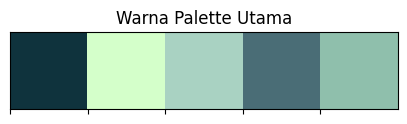

In [5]:
# kumpulan warna palet
colors     = ["#0F333D", "#D4FFCA", "#A9D2C2", "#4A6D76", "#8FBFAC"]
my_palette = sns.color_palette(["#0F333D", "#D4FFCA", "#A9D2C2", "#4A6D76", "#8FBFAC"])
cmap       = mcolors.ListedColormap(colors)

sns.palplot(sns.color_palette(colors))
plt.title('Warna Palette Utama')
plt.show()

<a id="1"></a>
# <p style="padding:15px;background-color:#022629;margin:0;color:#91f2eb;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">2. Data Understanding</p>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_csv('/content/drive/MyDrive/SicK/Modeling/data_transaction_2021-2023_Stationary, Digital Printing and Office Equipment Data Transaction.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

In [8]:
df = pd.DataFrame(data)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

,branch,divisi,transaksi,tanggal,customer,cs,produk,quantity,satuan,omset
0,Utama,JLD,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,CETAK POSTER,3.0,lbr,45000.0
1,Utama,ATK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,STEROFOAM 2x1 M KETEBALAN 2 CM,1.0,pcs,75000.0
2,Utama,CTK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,NAME PIN SWISSBEL,2.0,bh,170000.0
3,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS F4/A4S 70 GR,6190.0,lbr,1857000.0
4,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS WARNA F4/A4S 70 GR,830.0,lbr,290500.0
...,...,...,...,...,...,...,...,...,...,...
296224,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,LASER COLOR PRINT 70-120 gr 10+ (C),15.0,lbr,60000.0
296225,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,BIAYA POTONG,15.0,lbr,112500.0
296226,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER COLOR PRINT STIKER 1+ (C),7.0,lbr,52500.0
296227,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER CLR P 260/B/J/L/BC 1+ (C ),1.0,lbr,6000.0


In [9]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296229 entries, 0 to 296228
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   branch     296229 non-null  object 
 1   divisi     296229 non-null  object 
 2   transaksi  296229 non-null  object 
 3   tanggal    296229 non-null  object 
 4   customer   296229 non-null  object 
 5   cs         296229 non-null  object 
 6   produk     296229 non-null  object 
 7   quantity   296229 non-null  float64
 8   satuan     296229 non-null  object 
 9   omset      296229 non-null  float64
dtypes: float64(2), object(8)
memory usage: 22.6+ MB


In [10]:
df.describe().T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,count,mean,std,min,25%,50%,75%,max
quantity,296229.0,51.868673,1.047315e+03,0.0,1.0,2.0,8.0,410000.0
omset,296229.0,228320.495420,2.137796e+06,0.0,15000.0,40000.0,120000.0,800000000.0


In [11]:
df['divisi'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['JLD', 'ATK', 'CTK', 'PC', 'Pinjaman Sementara', 'OE', 'LCD'],
      dtype=object)

In [12]:
df['cs'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['ITA', 'DIJA', 'YAYA', 'ELVIRA', 'ALDA', 'IDA', 'NILAM', 'ANGEL',
       'MARIA', 'YULI', 'FITA', 'NORIS', 'RINA', 'unknown', 'WILA',
       'DICKY', 'BUDI', 'MILKHA', 'MIMI', 'BELA', 'OKKY', 'TERE', 'INANG',
       'CIKA', 'LEONY', 'ARIF', 'ONI', 'ALDY', 'NICIA', 'S.000004',
       'YUDI', 'RYAN', 'ALDE', 'FEKI', 'ILHA', 'ZIDAN', 'HENDRI', 'OPAN',
       'FERDY', 'MELSI', 'IKHA', 'JUFRY', 'ADM', 'NURUL', 'GRACE',
       'SORAYA', 'LASTRI', 'IKA', 'LIDYA', 'MAYA', 'GRACEMLM', 'KAREN',
       'RIA', 'NITA', 'SAKINA', 'IRA', 'YASNI', 'EKHA', 'MELSY', 'NUR',
       'RENDY'], dtype=object)

In [13]:
c = list(df['produk'].value_counts())
d = list(df['produk'].unique())
top_20_produk = pd.DataFrame(list(zip(d[0:21],c[0:21])),columns =['produk', 'Count'])
top_20_produk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

,produk,Count
0,CETAK POSTER,26836
1,STEROFOAM 2x1 M KETEBALAN 2 CM,14294
2,NAME PIN SWISSBEL,11753
3,PHOTO COPY HVS F4/A4S 70 GR,10074
4,PHOTO COPY HVS WARNA F4/A4S 70 GR,8796
5,JILID HARD COVER,8217
6,CETAK NCR 1/4F 1 WRN 2 PLY,7442
7,EPSON TINTA PRINT 65 ML SERIES 003 WARNA HITAM,6945
8,SABLON BOTOL TUMBLER,6618
9,POP-1 KERTAS THERMAL UK. 57 x 47 MM,5527


Tidak menggunakan data yang duplikat

In [14]:
df2 = df.copy()
dup_transaksi = df[df.duplicated(subset='transaksi', keep=False)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



- Tipe Data
- Missing Value
- Duplikat
- Outlier
- Distribusi Statistik

#### Menggabungkan setiap id transaksi yang sama

In [15]:
dup_transaksi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,branch,divisi,transaksi,tanggal,customer,cs,produk,quantity,satuan,omset
0,Utama,JLD,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,CETAK POSTER,3.0,lbr,45000.0
1,Utama,ATK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,STEROFOAM 2x1 M KETEBALAN 2 CM,1.0,pcs,75000.0
2,Utama,CTK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,NAME PIN SWISSBEL,2.0,bh,170000.0
3,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS F4/A4S 70 GR,6190.0,lbr,1857000.0
4,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS WARNA F4/A4S 70 GR,830.0,lbr,290500.0
...,...,...,...,...,...,...,...,...,...,...
296224,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,LASER COLOR PRINT 70-120 gr 10+ (C),15.0,lbr,60000.0
296225,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,BIAYA POTONG,15.0,lbr,112500.0
296226,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER COLOR PRINT STIKER 1+ (C),7.0,lbr,52500.0
296227,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER CLR P 260/B/J/L/BC 1+ (C ),1.0,lbr,6000.0


In [16]:
df2.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



3273

In [17]:
df2 = df2.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [18]:
df2.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0

In [19]:
df2.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0
branch,0
divisi,0
transaksi,0
tanggal,0
customer,0
cs,0
produk,0
quantity,0
satuan,0
omset,0


In [20]:
df2.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
Index: 292956 entries, 0 to 296228
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   branch     292956 non-null  object 
 1   divisi     292956 non-null  object 
 2   transaksi  292956 non-null  object 
 3   tanggal    292956 non-null  object 
 4   customer   292956 non-null  object 
 5   cs         292956 non-null  object 
 6   produk     292956 non-null  object 
 7   quantity   292956 non-null  float64
 8   satuan     292956 non-null  object 
 9   omset      292956 non-null  float64
dtypes: float64(2), object(8)
memory usage: 24.6+ MB


In [21]:
cobaTes_transaksi = df2[df2['transaksi'] == '0263119JL0121']
cobaTes_transaksi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,branch,divisi,transaksi,tanggal,customer,cs,produk,quantity,satuan,omset
296223,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,LASER CLR P 260/B/J/L/BC 10+ (C ),10.0,lbr,50000.0
296224,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,LASER COLOR PRINT 70-120 gr 10+ (C),15.0,lbr,60000.0
296225,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,BIAYA POTONG,15.0,lbr,112500.0


In [22]:
df2.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['branch', 'divisi', 'transaksi', 'tanggal', 'customer', 'cs', 'produk',
       'quantity', 'satuan', 'omset'],
      dtype='object')

In [23]:
df2['transaksi'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['4958/JL/UTM/1223', '4959/JL/UTM/1223', '4960/JL/UTM/1223', ...,
       '0263115JL0121', '0263119JL0121', '0263118JL0121'], dtype=object)

In [24]:
transaksi_1 = df2['transaksi'].str.len() >= 10

transaksi_bersih_1 = df2[transaksi_1]
transaksi_bersih_1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,branch,divisi,transaksi,tanggal,customer,cs,produk,quantity,satuan,omset
0,Utama,JLD,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,CETAK POSTER,3.0,lbr,45000.0
1,Utama,ATK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,STEROFOAM 2x1 M KETEBALAN 2 CM,1.0,pcs,75000.0
2,Utama,CTK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,NAME PIN SWISSBEL,2.0,bh,170000.0
3,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS F4/A4S 70 GR,6190.0,lbr,1857000.0
4,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS WARNA F4/A4S 70 GR,830.0,lbr,290500.0
...,...,...,...,...,...,...,...,...,...,...
296224,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,LASER COLOR PRINT 70-120 gr 10+ (C),15.0,lbr,60000.0
296225,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,BIAYA POTONG,15.0,lbr,112500.0
296226,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER COLOR PRINT STIKER 1+ (C),7.0,lbr,52500.0
296227,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER CLR P 260/B/J/L/BC 1+ (C ),1.0,lbr,6000.0


In [25]:
df3 = transaksi_bersih_1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [26]:
grup_df = df3.groupby(['transaksi', 'tanggal'])
aggreg  = {
    'branch': 'first',
    'divisi': 'first',
    'customer': 'first',
    'cs': 'first',
    'produk': lambda x: ', '.join(x),
    'quantity': 'sum',
    'omset': 'sum',
    'satuan': 'first'
}

df3 = grup_df.agg(aggreg).reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [27]:
df3.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,transaksi,tanggal,branch,divisi,customer,cs,produk,quantity,omset,satuan
188133,9995/KSR/UTM/1023,2023-10-24 14:04:27,Utama,ATK,Normal,NILAM,3M ISOLASI PE FOAM DOUBLE TAPE GABUS,1.0,15000.0,pcs
188134,9996/KSR/UTM/1023,2023-10-24 14:05:17,Utama,ATK,Normal,BELA,GLACIO CLIPBOARD KULIT WARNA BIRU,1.0,35000.0,pcs
188135,9997/KSR/UTM/1023,2023-10-24 14:14:00,Utama,ATK,Normal,BELA,"SIDU KERTAS HVS UKURAN F4 75 GSM, SIDU KERTAS ...",3.0,176000.0,rim
188136,9998/KSR/UTM/1023,2023-10-24 14:20:21,Utama,JLD,Normal,MARIA,LAMINATING FOLIO,10.0,50000.0,lbr
188137,9999/KSR/UTM/1023,2023-10-24 14:22:34,Utama,ATK,Normal,ALDA,LENEN KERTAS PUTIH,1.0,75000.0,pcs


In [28]:
del df3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### Sebelum itu
Dikarenakan dataset yang didapat tidak memiliki informasi lebih rinci selain nama produk. Maka dari itu kami menerapkan teknik NLP untuk membuat variabel baru yaitu `kategori` yang mengelompokkan suatu produk demi kemudahan visuallisasi nantinya dengan tujuan untuk memaksimalkan potensi insight yang ingin dicapai.

Kode detail untuk penerapan NLP ada pada file `labeling_nlp.ipynb`.

In [29]:
df3 = pd.read_csv('/content/drive/MyDrive/SicK/Modeling/Transaksi_Bersih_Total.csv', usecols=[
    'transaksi', 'tanggal', 'branch', 'divisi', 'customer', 'cs',
    'produk', 'quantity', 'omset', 'satuan', 'kategori'
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

In [32]:
df3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,transaksi,tanggal,branch,divisi,customer,cs,produk,quantity,omset,satuan,kategori
0,0262948JL0121,2021-01-04 09:37:15,Digital Printing,Layar LCD,Normal,NITA,NAMEPIN HITAM STANDAR BAHAN,1.0,27500.0,buah,Perlengkapan Kantor
1,0262949JL0121,2021-01-04 09:35:40,Digital Printing,Layar LCD,Normal,RENDY,LASER COLOR PRINT STIKER 25+ (C),30.0,180000.0,lbr,Percetakan dan Kertas
2,0262950JL0121,2021-01-04 09:36:26,Digital Printing,Layar LCD,Normal,NUR,CETAK BUKU,2.0,210000.0,buku,Percetakan dan Kertas
3,0262951JL0121,2021-01-04 09:41:50,Digital Printing,Layar LCD,Normal,SORAYA,"DESIGN/SETING MASTER LEVEL D, LASER COLOR PRIN...",11.0,115000.0,lbr,Percetakan dan Kertas
4,0262952JL0121,2021-01-04 09:40:55,Digital Printing,Layar LCD,Normal,NUR,"LASER COLOR PRINT 70-120 gr 25+ (C), JEPIT KAL...",144.0,450000.0,lbr,Percetakan dan Kertas
...,...,...,...,...,...,...,...,...,...,...,...
182585,6059/KSR/UTM/0823,2023-08-16 13:52:29,Utama,Alat Tulis Kantor,Normal,BELA,PILOT PULPEN 0.7 G-2 HITAM,1.0,20000.0,pcs,Perlengkapan Kantor
182586,6060/KSR/UTM/0823,2023-08-16 13:53:24,Utama,Alat Tulis Kantor,Normal,NILAM,"FABER-CASTEL PENSIL 2B, DEBOZZ PENGHAPUS 526 B...",3.0,13000.0,pcs,Perlengkapan Kantor
182587,6061/KSR/UTM/0823,2023-08-16 13:55:35,Utama,Alat Tulis Kantor,Normal,NILAM,"BAZIC PAKU TINDIS 100, KAPAL LAYAR CREPE SMALL...",5.0,41000.0,pcs,Perlengkapan Kantor
182588,6062/KSR/UTM/0823,2023-08-16 14:11:09,Utama,Alat Tulis Kantor,Normal,BELA,KINGCO STEROFOAM,2.0,17000.0,pcs,Lain-lain


In [30]:
df4 = df3['produk'].str.split(', ', expand=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [31]:
df4.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
182585,PILOT PULPEN 0.7 G-2 HITAM,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
182586,FABER-CASTEL PENSIL 2B,DEBOZZ PENGHAPUS 526 B-40,SDI RAUTAN,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
182587,BAZIC PAKU TINDIS 100,KAPAL LAYAR CREPE SMALL MERAH PUTIH,SAKURA PITA KAIN MERAH PUTIH 1CM,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
182588,KINGCO STEROFOAM,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
182589,JILID LAKBAN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


#### 20 Barang yang dibelli bersamaan

In [33]:
items_total = df4.apply(pd.Series.value_counts).sum(axis=1)
items_total = pd.DataFrame({'items': items_total.index,
                            'transactions': items_total.values})

items_total.sort_values('transactions',
                         ascending=False).head(20).reset_index(drop=True).style.background_gradient(cmap='ocean_r')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,items,transactions
0,PEMBELIAN ATK,26764.000000
1,LASER COLOR PRINT STIKER VINIL/TRANS 1+ (C),14167.000000
2,OUTDOR PRINT VINYL,10523.000000
3,LASER CLR P 260/B/J/L/BC 1+ (C ),9987.000000
4,GLOSSY LAMINATING,8719.000000
5,LASER COLOR PRINT ALL 1+ (SM/C/F),8133.000000
6,LASER COLOR PRINT STIKER 1+ (C),7397.000000
7,BIAYA POTONG,6859.000000
8,PHOTO COPY HVS F4/A4S 70 GR,6013.000000
9,DESIGN/SETING MASTER LEVEL F,5464.000000


#### Mencari duplikat

In [34]:
df4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,NAMEPIN HITAM STANDAR BAHAN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,LASER COLOR PRINT STIKER 25+ (C),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,CETAK BUKU,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,DESIGN/SETING MASTER LEVEL D,LASER COLOR PRINT STIKER 10+ (C),None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,LASER COLOR PRINT 70-120 gr 25+ (C),JEPIT KALENDER,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182585,PILOT PULPEN 0.7 G-2 HITAM,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
182586,FABER-CASTEL PENSIL 2B,DEBOZZ PENGHAPUS 526 B-40,SDI RAUTAN,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
182587,BAZIC PAKU TINDIS 100,KAPAL LAYAR CREPE SMALL MERAH PUTIH,SAKURA PITA KAIN MERAH PUTIH 1CM,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
182588,KINGCO STEROFOAM,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [35]:
df4['jml_dup'] = df4.iloc[:, 0:48].apply(pd.Series.nunique, axis=1)
df4['jml_produk'] = df4.iloc[:, 0:48].count(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

In [36]:
print('Banyaknya transaksi yang mengandung item duplikat adalah:', len(df4[df4['jml_dup'] != df4['jml_produk']]))

Banyaknya transaksi yang mengandung item duplikat adalah: 5504


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [37]:
df_bersih = df4[df4['jml_dup'] == df4['jml_produk']].iloc[:, 0:49]
print('Banyaknya transaksi yang tidak mengandung item duplikat adalah:', len(df_bersih))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Banyaknya transaksi yang tidak mengandung item duplikat adalah: 177086


In [38]:
df_bersih

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,NAMEPIN HITAM STANDAR BAHAN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,LASER COLOR PRINT STIKER 25+ (C),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,CETAK BUKU,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,DESIGN/SETING MASTER LEVEL D,LASER COLOR PRINT STIKER 10+ (C),None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,LASER COLOR PRINT 70-120 gr 25+ (C),JEPIT KALENDER,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182585,PILOT PULPEN 0.7 G-2 HITAM,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
182586,FABER-CASTEL PENSIL 2B,DEBOZZ PENGHAPUS 526 B-40,SDI RAUTAN,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
182587,BAZIC PAKU TINDIS 100,KAPAL LAYAR CREPE SMALL MERAH PUTIH,SAKURA PITA KAIN MERAH PUTIH 1CM,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
182588,KINGCO STEROFOAM,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
rename_dict = {
    'CTK': 'Cetak',
    'ATK': 'Alat Tulis Kantor',
    'PC': 'Peralatan Komputer',
    'JLD': 'Jilid',
    'Pinjaman Sementara': 'Pinjaman Sementara',
    'LCD': 'Layar LCD',
    'OE': 'Office Equipment'
}

df3['divisi'] = df3['divisi'].replace(rename_dict)

In [39]:
df3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,transaksi,tanggal,branch,divisi,customer,cs,produk,quantity,omset,satuan,kategori
0,0262948JL0121,2021-01-04 09:37:15,Digital Printing,Layar LCD,Normal,NITA,NAMEPIN HITAM STANDAR BAHAN,1.0,27500.0,buah,Perlengkapan Kantor
1,0262949JL0121,2021-01-04 09:35:40,Digital Printing,Layar LCD,Normal,RENDY,LASER COLOR PRINT STIKER 25+ (C),30.0,180000.0,lbr,Percetakan dan Kertas
2,0262950JL0121,2021-01-04 09:36:26,Digital Printing,Layar LCD,Normal,NUR,CETAK BUKU,2.0,210000.0,buku,Percetakan dan Kertas
3,0262951JL0121,2021-01-04 09:41:50,Digital Printing,Layar LCD,Normal,SORAYA,"DESIGN/SETING MASTER LEVEL D, LASER COLOR PRIN...",11.0,115000.0,lbr,Percetakan dan Kertas
4,0262952JL0121,2021-01-04 09:40:55,Digital Printing,Layar LCD,Normal,NUR,"LASER COLOR PRINT 70-120 gr 25+ (C), JEPIT KAL...",144.0,450000.0,lbr,Percetakan dan Kertas


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182590 entries, 0 to 182589
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   transaksi  182590 non-null  object 
 1   tanggal    182590 non-null  object 
 2   branch     182590 non-null  object 
 3   divisi     182590 non-null  object 
 4   customer   182590 non-null  object 
 5   cs         182590 non-null  object 
 6   produk     182590 non-null  object 
 7   quantity   182590 non-null  float64
 8   omset      182590 non-null  float64
 9   satuan     182590 non-null  object 
 10  kategori   182590 non-null  object 
dtypes: float64(2), object(9)
memory usage: 15.3+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [41]:
print(df_bersih.shape)
print(df3.shape)

(177086, 49)
(182590, 11)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [42]:
df3_reset = df3.reset_index(drop=True)
df_bersih_reset = df_bersih.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [43]:
df5 = df3_reset.reindex(df_bersih_reset.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [44]:
df5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,transaksi,tanggal,branch,divisi,customer,cs,produk,quantity,omset,satuan,kategori
0,0262948JL0121,2021-01-04 09:37:15,Digital Printing,Layar LCD,Normal,NITA,NAMEPIN HITAM STANDAR BAHAN,1.0,27500.0,buah,Perlengkapan Kantor
1,0262949JL0121,2021-01-04 09:35:40,Digital Printing,Layar LCD,Normal,RENDY,LASER COLOR PRINT STIKER 25+ (C),30.0,180000.0,lbr,Percetakan dan Kertas
2,0262950JL0121,2021-01-04 09:36:26,Digital Printing,Layar LCD,Normal,NUR,CETAK BUKU,2.0,210000.0,buku,Percetakan dan Kertas
3,0262951JL0121,2021-01-04 09:41:50,Digital Printing,Layar LCD,Normal,SORAYA,"DESIGN/SETING MASTER LEVEL D, LASER COLOR PRIN...",11.0,115000.0,lbr,Percetakan dan Kertas
4,0262952JL0121,2021-01-04 09:40:55,Digital Printing,Layar LCD,Normal,NUR,"LASER COLOR PRINT 70-120 gr 25+ (C), JEPIT KAL...",144.0,450000.0,lbr,Percetakan dan Kertas
...,...,...,...,...,...,...,...,...,...,...,...
177081,399052-JL1223,2023-12-06 18:08:56,Digital Printing,Layar LCD,Normal,LIDYA,LASER COLOR PRINT STIKER VINIL/TRANS 1+ (C),5.0,50000.0,lbr,Percetakan dan Kertas
177082,399053-JL1223,2023-12-06 18:20:24,Digital Printing,Layar LCD,Member,NURUL,"LASER CLR P 260/B/J/L/BC 1+ (C ), LASER BW PRI...",3.0,20500.0,lbr,Percetakan dan Kertas
177083,399054-JL1223,2023-12-06 18:30:04,Digital Printing,Layar LCD,Normal,NURUL,STICKER LABEL/KEMASAN VINYL MIN 4X4,2.0,26000.0,lbr,Lain-lain
177084,399056-JL1223,2023-12-06 18:23:59,Digital Printing,Layar LCD,Normal,LIDYA,LASER COLOR PRINT ALL 1+ (SM/C/F),1.0,15000.0,lbr,Percetakan dan Kertas


In [45]:
df_bersih_2 = df_bersih_reset.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df5['tanggal'].unique()

In [46]:
df5['tanggal'] = pd.to_datetime(df5['tanggal'])
df5['Tahun'] = df5['tanggal'].dt.year
df5['Bulan'] = df5['tanggal'].dt.month
df5['Month'] = df5['tanggal'].dt.strftime('%B')
df5['Tanggal'] = df5['tanggal'].dt.day
df5['Jam'] = df5['tanggal'].dt.hour
df5['Menit'] = df5['tanggal'].dt.minute
df5['Detik'] = df5['tanggal'].dt.second

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

In [47]:
df5.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,transaksi,tanggal,branch,divisi,customer,cs,produk,quantity,omset,satuan,kategori,Tahun,Bulan,Month,Tanggal,Jam,Menit,Detik
0,0262948JL0121,2021-01-04 09:37:15,Digital Printing,Layar LCD,Normal,NITA,NAMEPIN HITAM STANDAR BAHAN,1.0,27500.0,buah,Perlengkapan Kantor,2021,1,January,4,9,37,15
1,0262949JL0121,2021-01-04 09:35:40,Digital Printing,Layar LCD,Normal,RENDY,LASER COLOR PRINT STIKER 25+ (C),30.0,180000.0,lbr,Percetakan dan Kertas,2021,1,January,4,9,35,40
2,0262950JL0121,2021-01-04 09:36:26,Digital Printing,Layar LCD,Normal,NUR,CETAK BUKU,2.0,210000.0,buku,Percetakan dan Kertas,2021,1,January,4,9,36,26
3,0262951JL0121,2021-01-04 09:41:50,Digital Printing,Layar LCD,Normal,SORAYA,"DESIGN/SETING MASTER LEVEL D, LASER COLOR PRIN...",11.0,115000.0,lbr,Percetakan dan Kertas,2021,1,January,4,9,41,50
4,0262952JL0121,2021-01-04 09:40:55,Digital Printing,Layar LCD,Normal,NUR,"LASER COLOR PRINT 70-120 gr 25+ (C), JEPIT KAL...",144.0,450000.0,lbr,Percetakan dan Kertas,2021,1,January,4,9,40,55


In [48]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177086 entries, 0 to 177085
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   transaksi  177086 non-null  object        
 1   tanggal    177086 non-null  datetime64[ns]
 2   branch     177086 non-null  object        
 3   divisi     177086 non-null  object        
 4   customer   177086 non-null  object        
 5   cs         177086 non-null  object        
 6   produk     177086 non-null  object        
 7   quantity   177086 non-null  float64       
 8   omset      177086 non-null  float64       
 9   satuan     177086 non-null  object        
 10  kategori   177086 non-null  object        
 11  Tahun      177086 non-null  int32         
 12  Bulan      177086 non-null  int32         
 13  Month      177086 non-null  object        
 14  Tanggal    177086 non-null  int32         
 15  Jam        177086 non-null  int32         
 16  Menit      177086 no

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [49]:
df5['Tahun'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([2021, 2022, 2023], dtype=int32)

In [50]:
df5_2021 = df5[df5['Tahun'] == 2021]
df5_2022 = df5[df5['Tahun'] == 2022]
df5_2023 = df5[df5['Tahun'] == 2023]
df5_2021_Jan = df5[(df5['Tahun'] == 2021) & (df5['Month'] == 'January')]

df5_2021.to_csv('/content/drive/MyDrive/SicK/Modeling/data_untuk_model/transaksi_2021.csv', index=False)
df5_2022.to_csv('/content/drive/MyDrive/SicK/Modeling/data_untuk_model/transaksi_2022.csv', index=False)
df5_2023.to_csv('/content/drive/MyDrive/SicK/Modeling/data_untuk_model/transaksi_2023.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [57]:
df5_2021_Jan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,transaksi,tanggal,branch,divisi,customer,cs,produk,quantity,omset,satuan,kategori,Tahun,Bulan,Month,Tanggal,Jam,Menit,Detik
0,0262948JL0121,2021-01-04 09:37:15,Digital Printing,Layar LCD,Normal,NITA,NAMEPIN HITAM STANDAR BAHAN,1.0,27500.0,buah,Perlengkapan Kantor,2021,1,January,4,9,37,15
1,0262949JL0121,2021-01-04 09:35:40,Digital Printing,Layar LCD,Normal,RENDY,LASER COLOR PRINT STIKER 25+ (C),30.0,180000.0,lbr,Percetakan dan Kertas,2021,1,January,4,9,35,40
2,0262950JL0121,2021-01-04 09:36:26,Digital Printing,Layar LCD,Normal,NUR,CETAK BUKU,2.0,210000.0,buku,Percetakan dan Kertas,2021,1,January,4,9,36,26
3,0262951JL0121,2021-01-04 09:41:50,Digital Printing,Layar LCD,Normal,SORAYA,"DESIGN/SETING MASTER LEVEL D, LASER COLOR PRIN...",11.0,115000.0,lbr,Percetakan dan Kertas,2021,1,January,4,9,41,50
4,0262952JL0121,2021-01-04 09:40:55,Digital Printing,Layar LCD,Normal,NUR,"LASER COLOR PRINT 70-120 gr 25+ (C), JEPIT KAL...",144.0,450000.0,lbr,Percetakan dan Kertas,2021,1,January,4,9,40,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,129271/JL/UTM/0121,2021-01-30 14:51:07,Utama,Alat Tulis Kantor,Normal,MELSI,CETAK MUG,50.0,1575000.0,bh,Percetakan dan Kertas,2021,1,January,30,14,51,7
5878,129272/JL/UTM/0121,2021-01-30 15:01:17,Utama,Alat Tulis Kantor,Normal,MELSI,"BANNER, BANNER, CETAK SPANDUK",7.0,1530000.0,lbr,Percetakan dan Kertas,2021,1,January,30,15,1,17
5879,129273/JL/UTM/0121,2021-01-30 15:30:13,Utama,Alat Tulis Kantor,Normal,MELSI,CETAK YASIN HARD COVER,12.0,420000.0,buku,Percetakan dan Kertas,2021,1,January,30,15,30,13
5880,129274/JL/UTM/0121,2021-01-30 16:02:01,Utama,Alat Tulis Kantor,Normal,MELSI,BIAYA SABLON,1.0,451000.0,lbr,Percetakan dan Kertas,2021,1,January,30,16,2,1


In [54]:
mask_2021 = df5['Tahun'] == 2021
mask_2022 = df5['Tahun'] == 2022
mask_2023 = df5['Tahun'] == 2023
mask_2021_Jan = (df5['Tahun'] == 2021) & (df5['Month'] == 'January')

df_bersih_2_2021 = df_bersih_2.loc[mask_2021]
df_bersih_2_2022 = df_bersih_2.loc[mask_2022]
df_bersih_2_2023 = df_bersih_2.loc[mask_2023]
df_bersih_2_2021_Jan = df_bersih_2.loc[mask_2021_Jan]

df_bersih_2_2021.to_csv('/content/drive/MyDrive/SicK/Modeling/data_untuk_model/cart_produk_2021.csv', index=False)
df_bersih_2_2022.to_csv('/content/drive/MyDrive/SicK/Modeling/data_untuk_model/cart_produk_2022.csv', index=False)
df_bersih_2_2023.to_csv('/content/drive/MyDrive/SicK/Modeling/data_untuk_model/cart_produk_2023.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [55]:
df5.to_csv('/content/drive/MyDrive/SicK/Modeling/data_untuk_model/transaksi_2021-2023.csv', index=False)
df_bersih_2.to_csv('/content/drive/MyDrive/SicK/Modeling/data_untuk_model/cart_produk_2021-2023.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [56]:
df_bersih_2_2021_Jan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,NAMEPIN HITAM STANDAR BAHAN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,LASER COLOR PRINT STIKER 25+ (C),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,CETAK BUKU,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,DESIGN/SETING MASTER LEVEL D,LASER COLOR PRINT STIKER 10+ (C),None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,LASER COLOR PRINT 70-120 gr 25+ (C),JEPIT KALENDER,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,PEMBELIAN ATK,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5878,PEMBELIAN ATK,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5879,PEMBELIAN ATK,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5880,PEMBELIAN ATK,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
